# yFinance
Links for References used for this excercise: 
1. https://github.com/ranaroussi/yfinance
2. https://www.geeksforgeeks.org/python/multithreaded-download-of-yahoo-stock-history-with-python-yfinance/
3. For handling dates and time: 
    *  https://docs.python.org/3/library/datetime.html for calling date and time info
    *  https://stackoverflow.com/questions/32490629/getting-todays-date-in-yyyy-mm-dd-in-python for formatting the date info 
    *  https://www.geeksforgeeks.org/python/python-datetime-strptime-function/ for strptime changing Date and time into a string to be used in the filename
4. Saving dataframe to csv files https://www.datacamp.com/tutorial/save-as-csv-pandas-dataframe
5. Info about saving files into different directories in codespaces https://docs.github.com/en/codespaces/about-codespaces/deep-dive
6. Translate function for stripping out multiple characters from string filename https://www.geeksforgeeks.org/python/python-replace-multiple-characters-at-once/

## Problem 1: Data from yFinance

In [5]:
# import required modules 
import yfinance as yf
import time
import datetime as dt
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt

In [6]:
# Combine all functions in one function called get_data() to download data from yfinance

# define program start time and dates for use in calculations 
start= time.time()
today = dt.date.today()
yesterday = today - dt.timedelta(days=1)
fivedaysago = today - dt.timedelta(days=5)

# Convert dates to string type data as is required by the yf.download function
strtoday = str(today)
strfivedaysago =str(fivedaysago)

# Define a list of stocks to track
ticker_list =['META','AAPL','AMZN','NFLX','GOOG']

# define the prices tuple
prices = ('Open', 'High', 'Low', 'Close', 'Volume')

# Define path to root file
datadir = "./data/"# Problem 1: Data from yfinance

def get_data():


    # Execute the yf.download operation and populating the data into a dataframe.  
    data =yf.download( 
        start= strfivedaysago,
        end= strtoday,
        interval= '15m',
        tickers = ticker_list,
        threads=True,
        group_by='ticker',
        auto_adjust = True,
        )
    return data



#call the function to get the data
data = get_data()

# Get date and time information for file name into the correct format
now = dt.datetime.now()
filename = now.strftime("%Y%m%d-%H%M%S")

# Write data to csv file. 
data.to_csv(datadir+filename+".csv", sep=',')

# This segment allows for monitoring the time taken to complete the execution of the program. 
print ('The program takes ', time.time()-start,'seconds.')

[*********************100%***********************]  5 of 5 completed

The program takes  0.24745798110961914 seconds.


## Problem 2: Plotting Data

In [7]:
# Problem 2: Plotting Data
# https://stackoverflow.com/questions/43074685/find-file-in-directory-with-the-highest-number-in-the-filename for filename with highest number, as this will be the latest created file

# List all files in the directory data 
list_of_files = os.listdir(datadir)

#sort the list to display the newest file in sorted order
list_of_files.sort(reverse = True)

# assign a variable name to the file selected as the latest file 
recent_file = list_of_files[0]

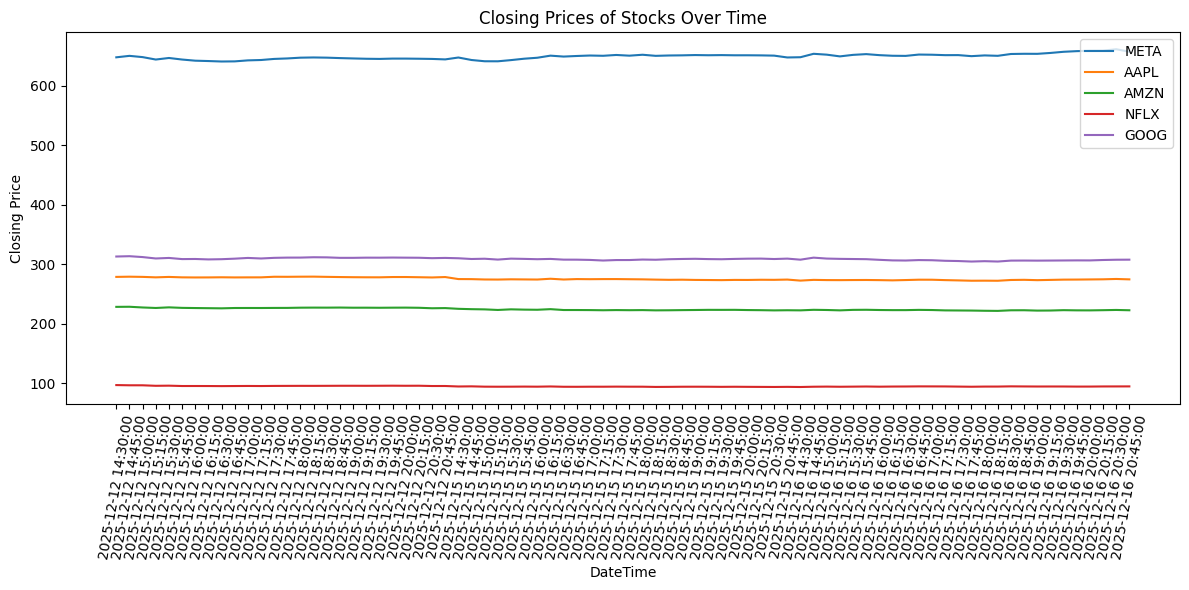

In [14]:
#Define a function Plot_data() to read the most recent data file and plot the closing prices of each stock
# Read the most recent data file into a dataframe
df = pd.read_csv(f'./data/{recent_file}', header=[0, 1], index_col=0)

#remove errors from dataframe
df.dropna(inplace=True)

# convert the datetime to string format
df.index = pd.to_datetime(df.index)
df.index = df.index.strftime('%Y-%m-%d %H:%M:%S')

def Plot_data():
    # Plot the closing prices of each stock
    plt.figure(figsize=(12,6))
    for ticker in ticker_list:
        plt.plot(df.index, df[(ticker, 'Close')], label=ticker)
    
    plt.xlabel('DateTime')
    plt.ylabel('Closing Price')
    plt.title('Closing Prices of Stocks Over Time')
    plt.legend()
    plt.xticks(rotation=80)
    plt.tight_layout()
    plt.savefig('closing_prices_chart.png', bbox_inches='tight')
    plt.show()

# Call the Plot_data function to execute the plotting
Plot_data()

# create a new dataframe for the closing prices
close_df = pd.DataFrame()
for ticker in ticker_list:
    close_df[ticker] = df[ticker]['Close']

## Problem 3: Script

## End